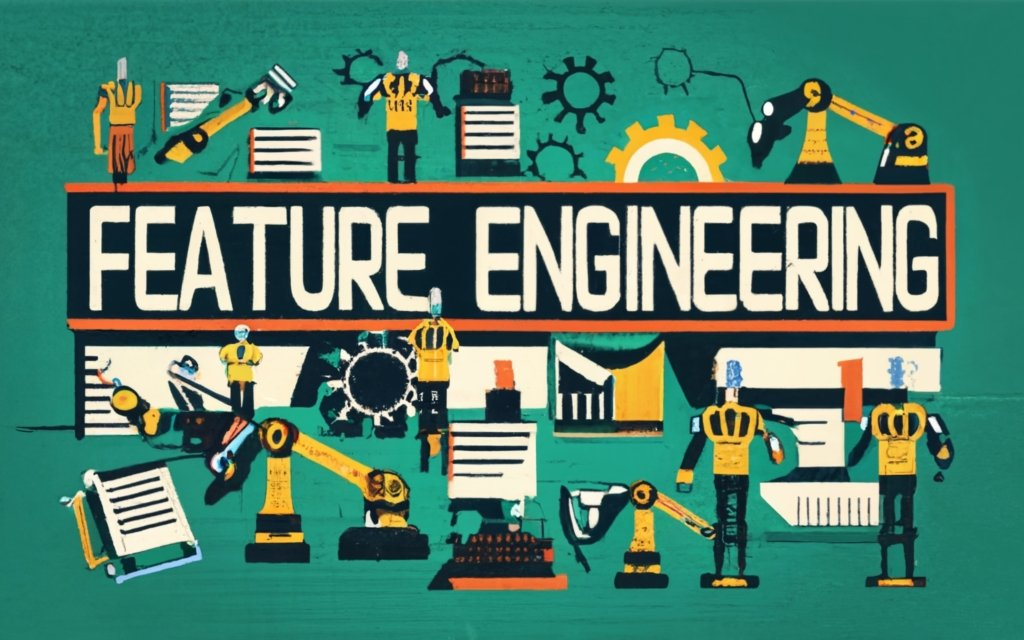

# Exploring Feature Engineering

We know that the real world data is not gonna be all pretty, it will most be not clean and have many issues such as missing values for some features, and having features of different scales. And when it comes to feeding data to an algorithm, it's very picky and so we might have to bring out new features from our data, reduce some features, expand some features, apply transformations to some features. And Finally make a pipeline of our flow, such that we don't have to repeat one by one for our test data. Let's discuss these in detail. Here's what lies ahead.

### Table Of Contents

1.Handling Missing values

   - 1.1 Problems of Having Missing values
   - 1.2 Understanding Types of Missing Values
   - 1.3 Dealing MV Using SimpleImputer Method
   - 1.4 Dealing MV Using KNN Imputer Method

2.Handling Categorical Values

   - 2.1 One Hot Encoding
   - 2.2 Label Encoding
   - 2.3 Ordinal Encoding
   - 2.4 Multi Label Binarizer
   - 2.5 Count/Frequency Encoding
   - 2.6 Target Guided Ordinal Encoding

## 1. Handling Missing Values

There can be various reasons for missing values such as Survey non responses, data entry errors, incompatible formats, privacy concerns, etc. And they could cause serveral problems during data analsis and modelling.
### 1.1 Problems of Having Missing Values

- **Bias in Analysis:** When data is missing not at random, it can introduce bias in your analysis. For example, if only high-income individuals tend to skip income disclosure in a survey, this can lead to an underestimation of the average income.


- **Reduced Sample Size:** Missing data can reduce the effective sample size, potentially leading to a loss of statistical power and less robust models.


- **Inaccurate Models:** Many machine learning algorithms cannot handle missing values. Attempting to train models on datasets with missing values may lead to errors or inaccurate predictions.

### 1.2 Types of Missing Data

Understanding the type of missing data is crucial for choosing the appropriate handling technique:

- **Missing Completely at Random (MCAR):** In this scenario, the missing values are randomly distributed and unrelated to any other variables. Handling MCAR is relatively straightforward, as it doesn't introduce bias.


- **Missing Not at Random (MNAR):** The missing values depend on the missing values themselves, making this the most complex type to handle. Dealing with MNAR often requires domain knowledge and modeling.


- **Missing at Random (MAR):** Missing values are related to other observed variables but not the missing values themselves. Handling MAR often involves statistical techniques to impute missing data.

1. Simple Imputer: Mean/ Median/Mode replacement
2. Random Sample Imputation
3. End of Distribution imputation
4. Arbitrary imputation
5. Frequent categories imputation

### 1.3 Dealing MV using Simple Imputer Method

Luckily, Scikit Learn Provides `sklearn.impute` API functionality to fill missing values in a dataset.

Now the question arises, **When should we apply this?** This is used when we want to fill missing values with mean, median, mode, or a constant. Mean/median imputation has the assumption that the data are missing completely at random(MCAR). 

And remember, Mean is sensitive to outliers, so when you have outliers in your data, use median.

You can also use pandas fillna to do this, but one beautiful thing here is that you can specify the `missing_values` parameter to indicate what is considered as missing in your dataset. This is important when dealing with datasets that represent missing values in various ways (e.g., NaN, -1, or other placeholders).

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
## Lets see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

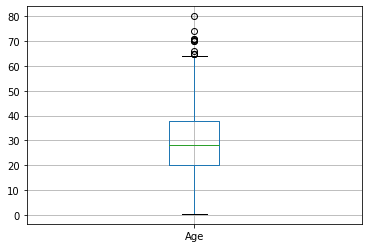

In [4]:
df.boxplot(column=['Age'])

We can see few outliers, so we can go with median.

In [5]:
median=df.Age.median()
median

28.0

In [6]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
df['Age_median']=si.fit_transform(np.array(df['Age']).reshape(-1, 1))

so simply create `SimpleImputer(strategy)` imputer object and use `.fit_transform(df[columns to impute])` method to fill your data with the expected strategy, then you can either create a new column with it or you can just assign it to the existing column.

**Strategy methods**
- Use `mean`, to replace missing values using the mean along each column. Can only be used with numeric data.

- Use `median`, to replace missing values using the median along each column. Can only be used with numeric data.

- Use `most_frequent`, to replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

- Use `constant`, to replace missing values with fill_value. Can be used with strings or numeric data.

In [7]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


we can observe that imputing by median doesn't affect it much and maintains the standard deviation close to the data with null values.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

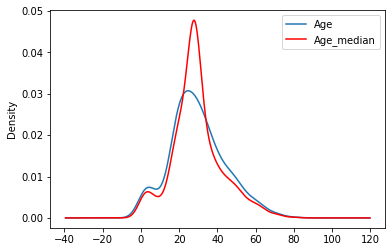

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

###      1.4 KNN Imputer

- KNN imputer is based on the idea of using the values of the nearest neighbors to impute missing data points in a dataset. So, For each missing point it calculates the distances with the rest of the points and it takes k close neighbors and the average of them will be replaced by missing value.


- K represents the number of nearest neighbors to consider. Choosing the right value for K is crucial. If you have domain knowledge or can cross-validate to find an optimal K value, KNN imputation can be very effective.


- The `metric` parameter defines the distance measure used to determine the similarity between data points. Common choices include 'euclidean', 'manhattan', or other distance metrics. The choice of metric can impact the results


- KNN imputation is particularly effective when there is a meaningful relationship between the missing values and other observed features. If the pattern of missingness is not entirely random and you believe that similar data points tend to have similar values for the missing feature, KNN can be a good choice.

In [10]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer with the number of neighbors (k)
imputer = KNNImputer(n_neighbors=5)

In [11]:
df = pd.read_csv('titanic.csv')
# Apply KNN imputation to the 'Age' column
df['Age'] = imputer.fit_transform(df[['Age']])

## 2. Handle Categorical Features

### 2.1 One Hot Encoding

In one-hot encoding, each unique category or label within a categorical feature is transformed into a binary (0 or 1) feature column. For each category, a new binary column is created, and it's marked with a 1 if the original feature belongs to that category and 0 if it doesn't. Here's how to use scikit-learn's OneHotEncoder API for one-hot encoding:



In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])

In [14]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [15]:
# Create a OneHotEncoder instance
encoder = OneHotEncoder()

# Fit the encoder to the 'Sex' column and transform it
encoded_sex = encoder.fit_transform(df[['Sex']])

# Create a DataFrame from the encoded data
encoded_sex_df = pd.DataFrame(encoded_sex.toarray())

# Concatenate the encoded 'Sex' DataFrame with the original dataset
df = pd.concat([df, encoded_sex_df], axis=1)

In [16]:
df.head()

,Sex,0,1
0,male,0.0,1.0
1,female,1.0,0.0
2,female,1.0,0.0
3,female,1.0,0.0
4,male,0.0,1.0


### 2.2 Label Encoding

Label Encoding is another technique for converting categorical data into a numerical format. Unlike one-hot encoding, where each category becomes its own binary feature column, label encoding assigns a unique integer to each category. And it gives the labels based on sort order.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset (replace 'titanic.csv' with the actual path to your dataset)
df = pd.read_csv('titanic.csv')

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit and transform the selected column using the encoder
df['sex_encoded'] = encoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [18]:
df[df.Embarked=='Q']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,1
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q,1
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q,1
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0


### 2.3 Ordinal Encoding

Ordinal Encoding is a technique for encoding categorical data where the categories have a meaningful order or ranking. Unlike Label encoding, Here you can specify the specific order for your column values.

In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Sample data
data = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']})

# Define the custom order of labels
custom_order = ['Small', 'Medium', 'Large']

# Initialize the OrdinalEncoder with the custom order
encoder = OrdinalEncoder(categories=[custom_order])

# Fit and transform the data
encoded_data = encoder.fit_transform(data[['Size']])

# Add the encoded values to the DataFrame
data['Encoded_Size'] = encoded_data

# Display the DataFrame with ordinal encoding
print(data)


     Size  Encoded_Size
0   Small           0.0
1  Medium           1.0
2   Large           2.0
3  Medium           1.0
4   Small           0.0


## 2.4 MultiLabel Binarizer

The MultiLabelBinarizer in scikit-learn is a preprocessing tool used to convert a list of multilabels (in the form of lists or sets) into a binary matrix where each label is treated as a separate binary feature. This is often used in multi-label classification tasks, where a data point can belong to multiple categories simultaneously.

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

# Sample data
labels = [('A', 'B'), ('B', 'C'), ('A', 'C'), ('D', 'E')]

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the data using the binarizer
binary_data = mlb.fit_transform(labels)

# Convert the binary data to a DataFrame for better visualization
binary_df = pd.DataFrame(binary_data, columns=mlb.classes_)

# Display the DataFrame with the binary matrix
print(binary_df)


   A  B  C  D  E
0  1  1  0  0  0
1  0  1  1  0  0
2  1  0  1  0  0
3  0  0  0  1  1


### 2.5 Count/Frequency Encoding

Count Encoding, also known as Frequency Encoding, is a method for encoding categorical variables by replacing each category with the count or frequency of that category in the dataset. 

In [21]:
import pandas as pd

# Sample data
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Red', 'Green', 'Blue', 'Red']})

# Perform count encoding
count_encoding = data['Color'].value_counts().to_dict()

# Map the counts to the original data
data['Color_Count'] = data['Color'].map(count_encoding)

# Display the DataFrame with count encoding
print(data)


   Color  Color_Count
0    Red            3
1   Blue            2
2    Red            3
3  Green            1
4   Blue            2
5    Red            3


### 2.6 Target Guided Ordinal Encoding
Ordering the labels according to the target, Replace the labels by the joint probability of being 1 or 0

In [22]:
import pandas as pd

# Sample data
data = pd.DataFrame({
    'City': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
    'Target': [0, 1, 1, 0, 1, 0, 1]
})

# Calculate the mean target value for each category
mean_target = data.groupby('City')['Target'].mean().sort_values()

# Create a mapping based on the sorted means
mapping = {city: rank for rank, city in enumerate(mean_target.index)}

# Map the categories to their corresponding rank
data['City_Rank'] = data['City'].map(mapping)

# Display the DataFrame with target-guided ordinal encoding
print(data)


  City  Target  City_Rank
0    A       0          1
1    B       1          2
2    A       1          1
3    C       0          0
4    B       1          2
5    C       0          0
6    A       1          1


In this code:

1. We have a sample DataFrame data with two columns: 'City' as the categorical feature and 'Target' as the target variable (binary in this case).


2. We calculate the mean target value for each category in the 'City' column using groupby and mean.


3. We sort the categories based on their mean target values.


4. We create a mapping between the original categories and their corresponding rank based on the sorted order of mean target values.


5. We use the map function to replace the original 'City' column with the ordinal values obtained from the target-guided encoding, creating a new column 'City_Rank.'

Stay Tuned for More Feature Engineering Techniques,  Happy learning :)